In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
from scipy.special import erf
import json

az.rcParams["plot.max_subplots"] = 80

First, load the output of our inference as an arviz InferenceData object:

In [2]:
#data = az.from_netcdf("ar_Xeff_Xp.cdf")
data = az.from_netcdf("/mnt/ceph/users/tcallister/autoregressive-bbh-inference-data/final-ar_Xeff_Xp.cdf")
az.summary(data,["ar_Xeff_std",
                 "ar_Xeff_tau",
                 "ar_Xp_std",
                 "ar_Xp_tau",
                 "logR20",
                 "alpha",
                 "mMin",
                 "log_dmMin",
                 "mu_m1",
                 "sig_m1",
                 "log_f_peak",
                 "mMax",
                 "log_dmMax",
                 "bq",
                 "kappa",
                 "nEff_inj_per_event",
                 "min_log_neff"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ar_Xeff_std,1.720,0.371,1.021,2.385,0.005,0.004,5067.0,3768.0,1.0
ar_Xeff_tau,1.354,0.413,0.650,2.000,0.006,0.005,4114.0,3471.0,1.0
ar_Xp_std,0.990,0.463,0.002,1.729,0.010,0.007,1977.0,1088.0,1.0
ar_Xp_tau,1.384,0.421,0.633,2.000,0.005,0.004,6426.0,2994.0,1.0
logR20,-1.694,0.790,-3.218,-0.206,0.013,0.010,3923.0,2722.0,1.0
alpha,-3.812,0.284,-4.306,-3.243,0.004,0.003,4024.0,3430.0,1.0
mMin,9.125,0.912,7.306,10.871,0.014,0.010,4368.0,2585.0,1.0
log_dmMin,-0.398,0.370,-0.991,0.228,0.005,0.004,4552.0,3063.0,1.0
mu_m1,34.203,1.877,31.064,37.457,0.046,0.033,3278.0,1483.0,1.0
sig_m1,3.747,1.792,2.000,6.939,0.040,0.033,3497.0,1762.0,1.0


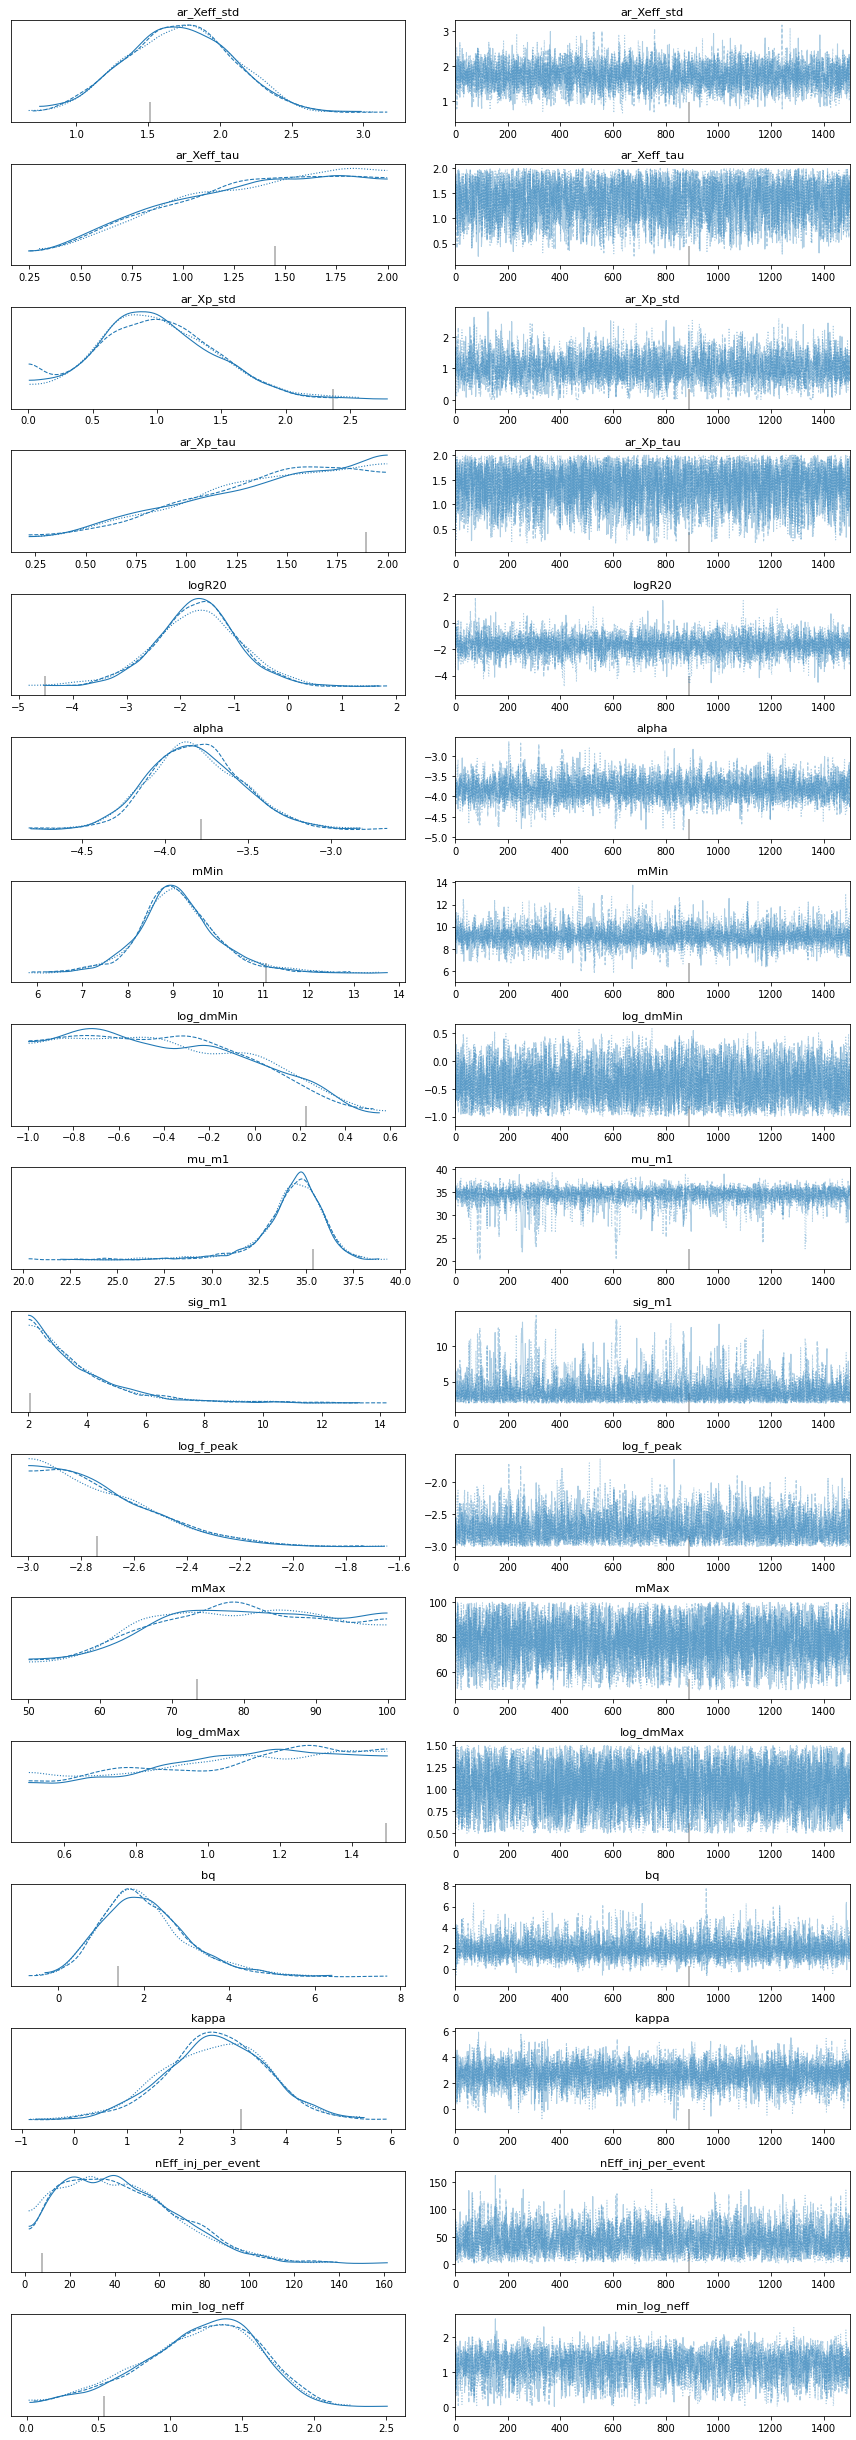

In [3]:
az.plot_trace(data,
              ["ar_Xeff_std",
                 "ar_Xeff_tau",
                 "ar_Xp_std",
                 "ar_Xp_tau",
                 "logR20",
                 "alpha",
                 "mMin",
                 "log_dmMin",
                 "mu_m1",
                 "sig_m1",
                 "log_f_peak",
                 "mMax",
                 "log_dmMax",
                 "bq",
                 "kappa",
                 "nEff_inj_per_event",
                 "min_log_neff"], compact=True)
plt.tight_layout()
plt.show()

In [4]:
Xeff_data = np.load('/mnt/ceph/users/tcallister/autoregressive-bbh-inference-data/final-ar_Xeff_Xp_data.npy',allow_pickle=True)[()]
Xeff_values = Xeff_data['Xeff_allSamples']
Xp_values = Xeff_data['Xp_allSamples']

In [5]:
samps = data.posterior.stack(draws=("chain", "draw"))

In [6]:
with open('gaussian-spin-xeff-xp-ppd-data.json','r') as jf:
    test1 = json.load(jf)
    
#print(np.array(test['chi_eff_grid']).shape,np.array(test['chi_eff_pdfs']).shape)

with open('default-spin-xeff-xp-ppd-data.json','r') as jf:
    test2 = json.load(jf)

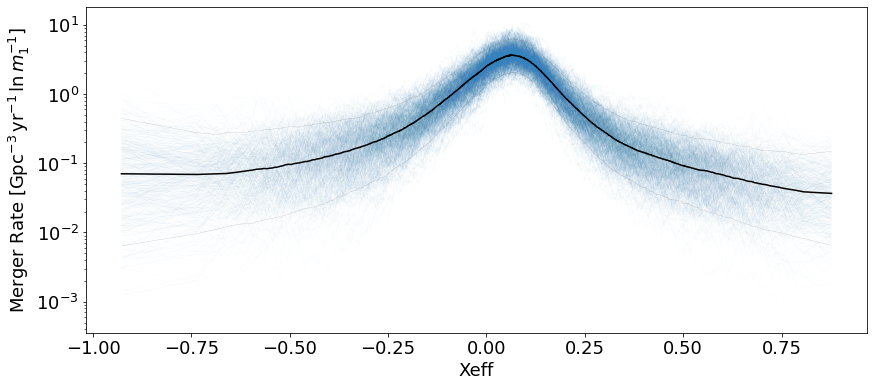

In [6]:
reduced_Xeffs = Xeff_values[::50]
reduced_f_Xeffs = samps['f_Xeffs'][::50]

R_Xeffs = np.zeros((reduced_Xeffs.size,reduced_f_Xeffs.shape[1]))
for i in range(reduced_f_Xeffs.shape[1]):
    R_Xeffs[:,i] = reduced_f_Xeffs[:,i]/np.trapz(reduced_f_Xeffs[:,i],reduced_Xeffs)

fig,ax = plt.subplots(figsize=(14,6))
for i in np.random.choice(range(reduced_f_Xeffs.shape[1]),500):
    ax.plot(reduced_Xeffs,R_Xeffs[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_Xeffs,np.median(R_Xeffs,axis=1),color='black')
ax.plot(reduced_Xeffs,np.quantile(R_Xeffs,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_Xeffs,np.quantile(R_Xeffs,0.95,axis=1),color='grey',lw=0.15)

"""ax.plot(test1['chi_eff_grid'],np.quantile(np.array(test1['chi_eff_pdfs']),0.05,axis=0),color='black',ls=':')
ax.plot(test1['chi_eff_grid'],np.median(np.array(test1['chi_eff_pdfs']),axis=0),color='black',ls=':')
ax.plot(test1['chi_eff_grid'],np.quantile(np.array(test1['chi_eff_pdfs']),0.95,axis=0),color='black',ls=':')

ax.plot(test2['chi_eff_grid'],np.quantile(np.array(test2['chi_eff_pdfs']),0.05,axis=1),color='black')
ax.plot(test2['chi_eff_grid'],np.median(np.array(test2['chi_eff_pdfs']),axis=1),color='black')
ax.plot(test2['chi_eff_grid'],np.quantile(np.array(test2['chi_eff_pdfs']),0.95,axis=1),color='black')"""

ax.tick_params(labelsize=18)
#ax.set_xlim(0,1.5)
#ax.set_ylim(0,3)
#ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_xticks([10,30,100])
#ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_xlabel('Xeff',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\ln m_1^{-1}$]',fontsize=18)

plt.show()

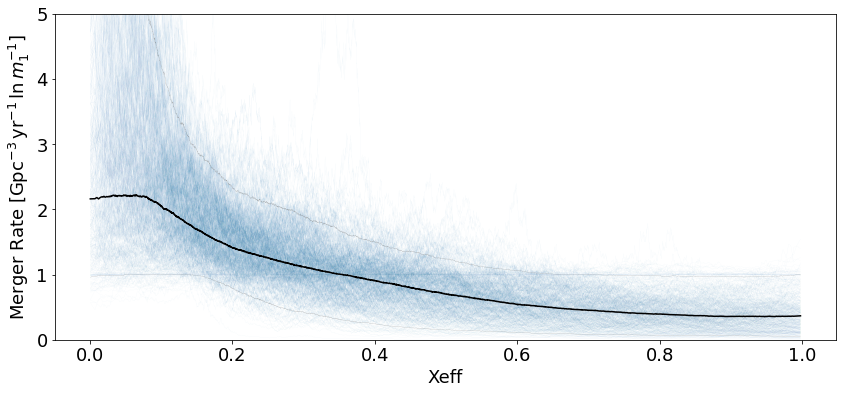

In [7]:
reduced_Xps = Xp_values[::50]
reduced_f_Xps = samps['f_Xps'][::50]

R_Xps = np.zeros((reduced_Xps.size,reduced_f_Xps.shape[1]))
for i in range(reduced_f_Xps.shape[1]):
    R_Xps[:,i] = reduced_f_Xps[:,i]/np.trapz(reduced_f_Xps[:,i],reduced_Xps)

fig,ax = plt.subplots(figsize=(14,6))
for i in np.random.choice(range(reduced_f_Xps.shape[1]),500):
    ax.plot(reduced_Xps,R_Xps[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_Xps,np.median(R_Xps,axis=1),color='black')
ax.plot(reduced_Xps,np.quantile(R_Xps,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_Xps,np.quantile(R_Xps,0.95,axis=1),color='grey',lw=0.15)

#ax.plot(test1['chi_p_grid'],np.quantile(np.array(test1['chi_p_pdfs']),0.05,axis=0),color='black',ls=':')
#ax.plot(test1['chi_p_grid'],np.median(np.array(test1['chi_p_pdfs']),axis=0),color='black',ls=':')
#ax.plot(test1['chi_p_grid'],np.quantile(np.array(test1['chi_p_pdfs']),0.95,axis=0),color='black',ls=':')

#ax.plot(test2['chi_p_grid'],np.quantile(np.array(test2['chi_p_pdfs']),0.05,axis=1),color='black')
#ax.plot(test2['chi_p_grid'],np.median(np.array(test2['chi_p_pdfs']),axis=1),color='black')
#ax.plot(test2['chi_p_grid'],np.quantile(np.array(test2['chi_p_pdfs']),0.95,axis=1),color='black')

ax.tick_params(labelsize=18)
#ax.set_xlim(0,1.5)
ax.set_ylim(0,5)
#ax.set_xscale('log')
#ax.set_yscale('log')

#ax.set_xticks([10,30,100])
#ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_xlabel('Xeff',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\ln m_1^{-1}$]',fontsize=18)

plt.show()